# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
    
        - абонентская плата отсутствует;
        - стоимость одной минуты поездки — 88 рублей;
        - стоимость старта (начала поездки) — 5050 рублей;
    с подпиской Ultra
      
        - абонентская плата — 199199 рублей в месяц;
        - стоимость одной минуты поездки — 66 рублей;
        - стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import numpy as np
from scipy import stats as st

## Шаг. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv', sep=',') # читаем csv-файл
rides_go = pd.read_csv('/datasets/rides_go.csv', sep=',') # читаем csv-файл
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep=',') # читаем csv-файл

### Выведим первые строки датафрэйма `users_go`. Изучите общую информацию о наборе данных.

In [3]:
pd.set_option('max_columns', None) # условие для отображения всх столбцов датафрэйма
users_go.head(10) # покажем первые 10 строчек датафрейма users_go.

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# получение общей информации о данных из датафрейма users_go
users_go.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В данных нет пропусков. На первый взгляд типы данных указанны корректно. Наименования столбцов - корректны.

### Выведим первые строки датафрэйма `rides_go`. Изучите общую информацию о наборе данных.

In [5]:
rides_go.head(10) # покажем первые 10 строчек датафрейма rides_go.

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
# получение общей информации о данных из датафрейма rides_go
rides_go.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В данных нет пропусков. Необходимо изменить тип данных в столбце `date`, на тип даты. Наименования столбцов - корректны.

### Выведим первые строки датафрэйма `subscriptions_go`. Изучите общую информацию о наборе данных.

In [7]:
subscriptions_go.head(10) # покажем первые 10 строчек датафрейма subscriptions_go.

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
# получение общей информации о данных из датафрейма rides_go
subscriptions_go.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В данных нет пропусков. Типы данных указанны корректно. Наименования столбцов - корректны.

## Шаг. Предобработка данных

#### Приведем столбец `date` к типу даты pandas.

In [9]:
# замена типа данных на формат даты.
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

Проверим как изменился тип данных.

In [10]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца `date`.

In [11]:
# используем класс DatetimeIndex и применим к нему атрибут year
pd.DatetimeIndex(rides_go['date']).year.unique()

Int64Index([2021], dtype='int64', name='date')

Данные в датафрэйме `rides_go` взяты за один 2021 год. Добавим столбец с месяцем в исходную таблицу.

In [12]:
# используем класс DatetimeIndex и применим к нему атрибут month
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Проверим датафрэймы на наличие явных дубликатов.

In [13]:
rides_go.duplicated().sum() 

0

В датафрэйме `rides_go` дубликатов нет.

In [14]:
users_go.duplicated().sum()

31

Так как в датафрэйме `users_go` есть уникальные номера `id`, то повтор строк - это явные дубликаты и эти строки необходим удалить.

In [15]:
# удалим дубликаты с помощью метода drop_duplicates и сбросим индексы
users_go = users_go.drop_duplicates().reset_index(drop=True)
# проверим 
users_go.duplicated().sum()

0

Дубликаты удалены.

#### Проверим датафрэймы на наличие неявных дубликатов.

In [16]:
users_go['name'].unique() # посмотрим уникальные значения св столбце name

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Все имена в одном формате - с заглавной буквы. Повторов нет.

In [17]:
users_go['city'].unique() # посмотрим уникальные значения св столбце city

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Не явных дубликатов нет.

## Шаг. Исследовательский анализ данных

#### Посмотрим на частоту всречаемости городов с помощью столбчатой диаграммы.

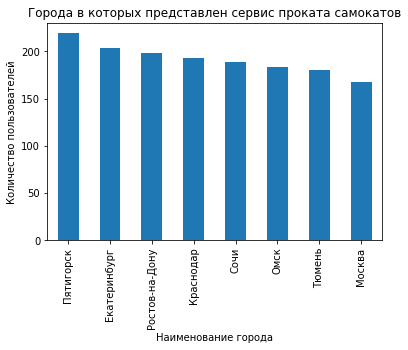

In [18]:
users_go['city'].value_counts().plot.bar()
plt.title("Города в которых представлен сервис проката самокатов")
plt.xlabel("Наименование города")
plt.ylabel("Количество пользователей")
plt.show()

В тройке лидеров по количеству клиентов - Пятигорск, Екатеринбург и Ростов-на-Дону. Меньше всего пользователей в Москве.

#### Найдем соотношение пользователей с подпиской и без подписки.

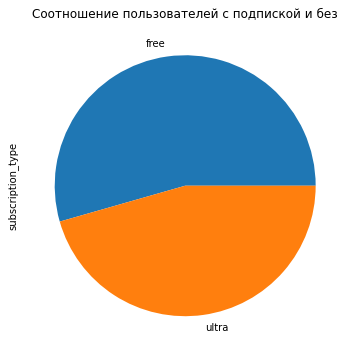

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64


In [19]:
users_go['subscription_type'].value_counts().plot(y='count', kind='pie', figsize=(6,6))
plt.title("Соотношение пользователей с подпиской и без")
plt.show()
print(users_go.groupby('subscription_type')['user_id'].count())

На графике видно, что пользователей без подписки - больше, чем с подпиской. Пользователей с подпиской - 699, без подписки - 835.

#### Опишем и визуализируем общую информацию о возрасте пользователей.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


0    25
dtype: int64

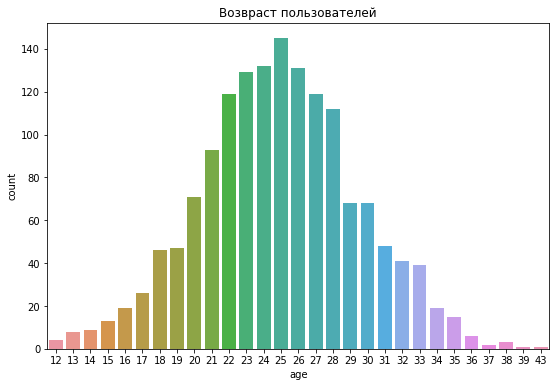

In [20]:
# вызываем функцию barplot()
age = (
    users_go.pivot_table(index='age', values='user_id', aggfunc='count')
)
age.columns = ['count']
matplotlib.rcParams['figure.figsize'] = [9, 6] # указываем размер графика
plt.title("Возвраст пользователей")
seaborn.barplot(x=age.index, y=age['count'])
print(users_go['age'].describe())
users_go['age'].mode()

Данные о возрасте распределены нормально. Со средним равным 25 (если округлить) и стандартным отклонением в 5 лет. Мода и Медиана так же равны 25 годам. Минимальный вовраст пользователей -12 лет, максимальный 43 года. На графике видно, что выбросов нет.

#### Опишем и визуализируем общую информацию о расстоянии, которое пользователь преодолел за одну поездку.

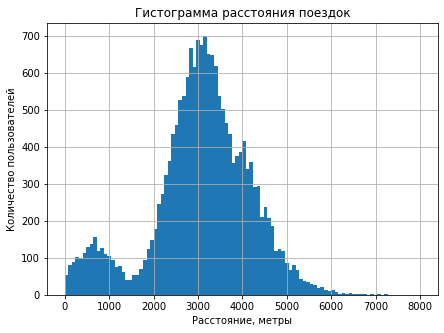

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


1232.9963753558854

In [21]:
matplotlib.rcParams['figure.figsize'] = [7, 5] # указываем размер графика
rides_go['distance'].hist(bins=100, range=(0, 8000)) # построим гистограмму
plt.title("Гистограмма расстояния поездок")
plt.xlabel("Расстояние, метры")
plt.ylabel("Количество пользователей")
plt.show()
print(rides_go['distance'].describe())
st.iqr(rides_go['distance'])

По графику распределение данных похоже на нормальное. Видно два пика: для коротких заездов - пик в районе 500 м, для более длинных заездов - пик около 3000м. Половина пользователей едут на расстояние до 3133 метров. Очевидных выбросов не наблюдается, поэтому данные оставляем без изменений. Межквартильный размах - 1233 метра.

#### Опишем и визуализируем общую информацию о продолжительности поездок.

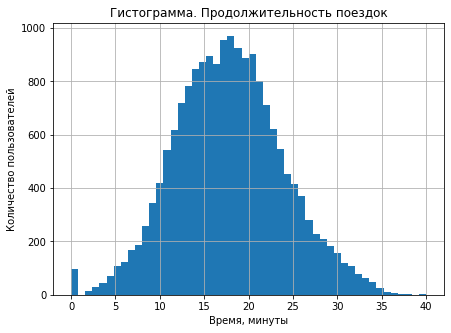

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


In [22]:
rides_go['duration'].hist(bins=50, range=(0, 40)) # построим гистограмму
plt.title("Гистограмма. Продолжительность поездок")
plt.xlabel("Время, минуты")
plt.ylabel("Количество пользователей")
plt.show()
print(rides_go['duration'].describe())

 - По графику распределение данных похоже на - распределение Пуассона. В среднем длительность одной поездки составляет около 17 мин. Но есть и аномально короткие поездки - меньше минуты. И достаточно длинные - около 40 мин. Но большая часть поездок (75%) заканчивается в течении 22 мин.
 
 - Наблюдается пик около 1 минуты. Эти данные похожи на анамалию. Проверим эти поездки подробнее. 

In [23]:
# посмотрим количество поездок удовлетворяющих условию
print('Супер быстрые поездки: ', len(rides_go.query('duration <= 1')))
print(rides_go.query('duration <= 1').head(20))

Супер быстрые поездки:  95
      user_id     distance  duration       date  month
6531      701  4196.445201       0.5 2021-08-31      8
6570      704  4830.824371       0.5 2021-10-14     10
6680      712  4684.004397       0.5 2021-03-04      3
6695      713  5215.642710       0.5 2021-02-25      2
6768      718  5197.436649       0.5 2021-02-11      2
6860      724  6225.520342       0.5 2021-12-16     12
6883      726  4452.491518       0.5 2021-03-01      3
7018      735  4406.954812       0.5 2021-04-13      4
7160      745  5286.167732       0.5 2021-08-17      8
7364      760  4881.391865       0.5 2021-08-29      8
7437      766  4539.088310       0.5 2021-12-22     12
7508      772  4718.820996       0.5 2021-05-22      5
7537      774  5488.141903       0.5 2021-05-27      5
7612      780  6112.644835       0.5 2021-11-23     11
7679      784  5202.815712       0.5 2021-06-03      6
7791      792  5353.189287       0.5 2021-11-06     11
7830      795  6262.302747       0.5 2

## Шаг. Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрэйм.

In [24]:
# объединим таблицы users_go и subscriptions_go, по типу подписки
data_subscriptions = users_go.merge(subscriptions_go, on='subscription_type', how='left')
# объединим получившуюся таблицу и  rides_go, по индентификатору пользователя
data = data_subscriptions.merge(rides_go, on='user_id', how='left')
data.head(10) # напечатаем 10 первых строк объединенной таблицы

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


In [25]:
print('Количество строк до объединения: ', len(rides_go))
print('Количество строк после объединения: ',(len(data)))

Количество строк до объединения:  18068
Количество строк после объединения:  18068


### Создадим датафрэйм с данными о пользователях без подписки.

Из датафрэйма созданного на этапе 4.1 создаем датафрэйм для пользователей без подписки.

In [26]:
data_free = data.query('subscription_type == "free"') 

In [27]:
data_free.info() #посмотрим общую информацию о новом датафрэйме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   minute_price       11568 non-null  int64         
 6   start_ride_price   11568 non-null  int64         
 7   subscription_fee   11568 non-null  int64         
 8   distance           11568 non-null  float64       
 9   duration           11568 non-null  float64       
 10  date               11568 non-null  datetime64[ns]
 11  month              11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


 Около 11500 поездок совершили пользователи без подписки.

### Создадим датафрэйм с данными о пользователях c подпиской.

Из датафрэйма созданного на этапе 4.1 создаем датафрэйм для пользователей с подпиской.

In [28]:
data_ultra = data.query('subscription_type == "ultra"') 

In [29]:
data_ultra.info() #посмотрим общую информацию о новом датафрэйме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   minute_price       6500 non-null   int64         
 6   start_ride_price   6500 non-null   int64         
 7   subscription_fee   6500 non-null   int64         
 8   distance           6500 non-null   float64       
 9   duration           6500 non-null   float64       
 10  date               6500 non-null   datetime64[ns]
 11  month              6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


 Около 6500 поездок совершили пользователи с подпиской. Почти в два раза меньше, чем без подписки.

### Визуализируем информацию о расстоянии поездки для пользователей без подписки.

Построим на одном графике гистограммы для двух групп пользователей с подпиской и без.

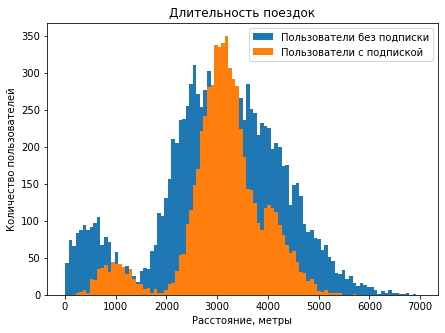

In [30]:
plt.hist(data_free['distance'],bins=100, range=(0, 7000))
plt.hist(data_ultra['distance'],bins=100, range=(0, 7000))
plt.title('Длительность поездок')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество пользователей')
plt.legend(['Пользователи без подписки','Пользователи с подпиской'])
plt.show()

Наблюдается два пика по расстоянию для пользователей с подпиской и без. 

 - Превый пик на короткие расстояния, для пользователей с попиской около 1000 м, для пользователей без подписки - около 700 м. Без подписки больше заездов на короткие расстояния, до 1000м. Это может быть связанно с тем, что без подписки нужно платить еще и за старт (50 рублей), за счет этого сама поездка выходит дороже, при одинаковом расстоянии.
 - Второй пик в районе 3100 м и он совпадает для обоих категорий. 
 - Распределение для пользователей без подписки имеет более широкий купол, скорей всего это зависит от того, что таких пользователей больше (почти в два раза), чем пользователей с попиской. Поэтому разброс расстояний шире.

### Визуализируем информацию о времени поездки для пользователей без подписки.

Построим на одном графике гистограммы для двух групп пользователей с подпиской и без.

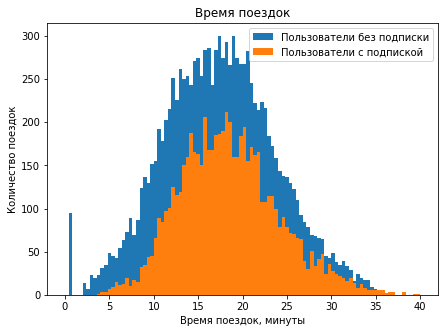

In [31]:
plt.hist(data_free['duration'],bins=100, range=(0, 40))
plt.hist(data_ultra['duration'],bins=100, range=(0, 40))
plt.title('Время поездок')
plt.xlabel('Время поездок, минуты')
plt.ylabel('Количество поездок')
plt.legend(['Пользователи без подписки','Пользователи с подпиской'])
plt.show()

 - По графику распределение данных похоже на - распределение Пуассона. В среднем длительность одной поездки составляет около 17 мин для обоих категорий. Общее распределение похоже для обоих категорий.
 - Распределение для пользователей без подписки имеет более широкий купол, скорей всего это зависит от того, что таких пользователей больше (почти в два раза), чем пользователей с попиской. Поэтому разброс времени шире. Так же пользователей без подписки больше и это видно по площади синего графика.
 - Время поездки около минуты только у пользователей без подписки. Возможно это акциия для таких клиентов - оплачивается только старт, а дальнейшие минуты бесплатные.

## Шаг. Подсчёт выручки

### Создадим датафрэйм с агрегированными данными по каждому пользователю.

 - Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
 - Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа: например, значения 25.3, 25.5 и 26.0 преобразуем к 26.

In [32]:
# сначала каждое значение из столбца duration округляется с помощью «потолка»: 
data['duration'] = np.ceil(data['duration']) 

# с помощью метода groupby сгруппируем данные в новую таблицу
data_aggregate = data.groupby(['user_id', 'month', 'subscription_type', 
                            'minute_price', 'start_ride_price', 
                            'subscription_fee']).agg({'month':['count'], 'distance':['sum'], 
                                                      'duration':['sum'],}).reset_index()
# переменуем столбцы
data_aggregate.columns=['user_id', 'month', 'subscription_type', 
                            'minute_price', 'start_ride_price', 
                            'subscription_fee', 'rides_count', 'distance','duration']

In [33]:
# посмотрим первые 10 строк новой таблицы
data_aggregate.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,rides_count,distance,duration
0,1,1,ultra,6,0,199,2,7027.511294,42.0
1,1,4,ultra,6,0,199,1,754.159807,7.0
2,1,8,ultra,6,0,199,2,6723.470560,46.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0
4,1,11,ultra,6,0,199,3,7003.499363,56.0


###  Добавим столбец с помесячной выручкой, которую принес каждый пользователь.

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах +стоимость подписки.

In [34]:
data_aggregate['revenue']=(
    data_aggregate['start_ride_price']*data_aggregate['rides_count']+
    data_aggregate['minute_price']*data_aggregate['duration']+
    data_aggregate['subscription_fee']
)
data_aggregate.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,rides_count,distance,duration,revenue
0,1,1,ultra,6,0,199,2,7027.511294,42.0,451.0
1,1,4,ultra,6,0,199,1,754.159807,7.0,241.0
2,1,8,ultra,6,0,199,2,6723.470560,46.0,475.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0,391.0
4,1,11,ultra,6,0,199,3,7003.499363,56.0,535.0


## Шаг. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Сравним длительность поездок для пользователей с подпиской и без.

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу о том, что пользователи с подпиской используют самокаты дольше, чем пользователи без подписки.

    - Нулевая гипотеза: средние значения длительности поездок из двух групп равны.
    - Альтернативная гипотеза: среднее значение длительности поездок с подпиской больше, чем среднее значение длительности поездок пользователей без подписки.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с суммами пользователей с подпиской `data_ultra['duration']`, затем выборку с суммами пользователей без подписки `data_free['duration']` — порядок важен. В качестве alternative нужно указать 'greater', то есть «больше».

In [35]:
# Среднее значение продолжительности поездок для пользователей с подпиской.
print('Среднее время поездок для пользователей с подпиской: ', data_ultra['duration'].mean())

# Среднее значение продолжительности поездок для пользователей без подписки.
print('Среднее время поездок для пользователей без подписки: ', data_free['duration'].mean())

# задаём уровень значимости
alpha = 0.005

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater', equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее время поездок для пользователей с подпиской:  18.54198516280583
Среднее время поездок для пользователей без подписки:  17.39090929866399
p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Полученное значение p-value (~5.68*10^-37) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской совершают более длительные поездки, чем пользователи без подписки. Среднее время у пользователей с подпиской больше, чем у пользователей без подписки.

### Сравним дальность поездок, для пользователей с подпиской, с оптимальным с точки зрения износа самоката значением равным 3130 метров.

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.


    - Нулевая гипотеза: среднее значение расстояний одной поездки по данным датафрэйма равно 3130.
    - Альтернативная гипотеза: среднее значение расстояний одной поездки для пользователей 
    с подпиской меньше 3130 метров.

В этом случае, нам необходимо провести односторонний тест, нужно использовать метод scipy.st.ttest_1samp(). Теперь в качестве аргументов указывайте alternative='less' для левосторонней H1. P-value, которое выдаст метод, будет рассчитываться для одного хвоста распределения.

In [36]:
# задаём уровень значимости
alpha = 0.005

# оптимальное расстояние с точки зрения износа самоката.
optimal_value = 3130

# Среднее значение продолжительности поездок для пользователей с подпиской.
print('Среднее время поездок для пользователей с подпиской: ', data_ultra['distance'].mean())

# проводим ttest о равенстве среднего генеральной совокупности числу
results = st.ttest_1samp(
    data_ultra['distance'], 
    optimal_value,
      alternative='less')

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Среднее время поездок для пользователей с подпиской:  3115.4453880370247
p-value: 0.08046311521502146
Нет оснований отвергнуть нулевую гипотезу


 Полученное значение p-value равное 0,08 больше заданного уровня значимости, поэтому нет оснований  отвергнуть нулевую гипотезу. Можно сказать, что пользователи с подпиской в среднем ездят не более чем 3130 метров.

### Сравним помесячную выручку для пользователей с подпиской и без.

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Проверим гипотезу о том, что пользователи с подпиской приносят больше выручки компании, чем пользователи без подписки.

- Нулевая гипотеза: средние значения выручки от отдельных пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение выручки которую приносят пользователи с подпиской больше, чем среднее значение выручки от пользователей без подписки.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с суммами пользователей с подпиской data_aggregate['revenue'], затем выборку с суммами пользователей без подписки data_aggregate['revenue'] — порядок важен. В качестве alternative нужно указать 'greater', то есть «больше».


In [37]:
# задаём уровень значимости
alpha = 0.005

# выручка первой группы пользователей (с подпиской)
ultra_revenue = data_aggregate.query('subscription_type == "ultra"')['revenue']
ultra_mean = data_aggregate.query('subscription_type == "ultra"')['revenue'].mean()
# Среднее значение выручки для пользователей с подпиской.
print('Среднее значение выручки для пользователей с подпиской: ', ultra_mean)



# выручка второй группы пользователей (без подписки)
free_revenue = data_aggregate.query('subscription_type == "free"')['revenue']
free_mean = data_aggregate.query('subscription_type == "free"')['revenue'].mean()
# Среднее значение выручки для пользователей без подписки.
print('Среднее значение выручки для пользователей без подписки: ', free_mean)



# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater', equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение выручки для пользователей с подпиской:  362.7921906022502
Среднее значение выручки для пользователей без подписки:  328.6413651073845
p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Полученное значение p-value (~8.87*10^-40) меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу. Есть основания говорить, что пользователи с подпиской приносят больше выручки сервису, чем пользователи без подписки. В среднем выручка по пользователям с подпиской, составляет 363 рубля в месяц, для пользователей без подписки - 329 рублей в месяц.

### Подберем тест для сравнения количеств обращений в техподдержку до обновления и после.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Так как выборки в этом случае будут зависимыми, иначе — парными. Это означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем вопросе это пара измерений для каждого пользователя — до и после обновления серверов.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения. Порядок внутридатасэтов важен.


## Шаг. Общий вывод.

**1. О данных.** В целом полученные данные корректным, без серьезных выбросов и аномалий. Обнаруженные дубликаты и выбросы удалены и в дальнейшем анализе не используются.

**2. Исследовательский анализ данных:**
   - В тройке лидеров по количеству клиентов - Пятигорск, Екатеринбург и Ростов-на-Дону. Меньше всего пользователей в Москве.
   - Пользователей без подписки - больше (835), чем с подпиской (699). 
   - Чаще всего сервисом пользуются пользователи с возрастом 25 лет. Минимальный вовраст -12 лет, максимальный 43 года. Мода и среднее так же равны 25 годам. 
   - На графике с распределением дальности поездок, видно два пика: для коротких заездов - 500 м, для более длинных заездов - пик около 3000м. Половина пользователей едут на расстояние до 3133 метров. Половина всех пользователей (в середине) совершает поездки от 2543 метров до 3776 метров.
   - В длительности поездок наблюдается пик около 1 минуты для пользователей без подписки. При этом расстояния поездок в некоторых случаях более 4000 метров. Возможно это выбросы или акция для клиентов без подписки - платишь за старт, а остальные минуты бесплатные, причину нужно уточнить у коллег. 
   - Распределение длительности поездок по Пуассону. В среднем длительность одной поездки составляет около 17 мин. Но есть и достаточно длинные - около 40 мин. Большая часть поездок (75%) заканчивается в течении 22 мин.



**3. Выводы по гипотезам.**

1. В первом случае мы предположили, что пользователи с подпиской используют самокаты дольше, чем пользователи без подписки.
    
**Вывод:** По результатам проверки этого предположения, можно отвергнуть нулевую гипотезу. И принять альтернативную. Есть основания говорить, что пользователи с подпиской совершают в среднем более длительные поездки, чем пользователи без подписки. Пользователи с подпиской могут быть «выгоднее» для компании, чем без подписки, так как ездят дольше.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

**Вывод:** По результатам исследования нет оснований  отвергнуть нулевую гипотезу. Можно сказать, что пользователи с подпиской в среднем ездят не более чем 3130 метров. Это выгодно с точки зрения износа самоката, так как самокат изнашивается медленнее. 

3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Вывод:** По результатам исследования мы отвергаем нулевую гипотезу. Есть основания говорить, что пользователи с подпиской приносят больше выручки сервису, чем пользователи без подписки. Еще один пункт к "выгоде" от подписки. Возможно отделу маркетинга стоит активнее заинтересовывать пользователей в подписке, так этот явно выгоднее компании.